<a href="https://colab.research.google.com/github/odenyirechristopher/Week-4-Introduction-to-Machine-Learning/blob/main/Week_4_Introduction_to_Machine_Learning_Independent_Project_Emmanuel_Odenyire.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to Machine Learning

## Problem Statement

#### **Background Information**

HR analytics is revolutionising the way human resources departments operate, leading to higher efficiency and better results overall. Human resources have been using analytics for years. However, the collection, processing, and analysis of data have been largely manual, and given the nature of human resources dynamics and HR KPIs, the approach has been constraining HR. Therefore, it is surprising that HR departments woke up to the utility of machine learning so late in the game.



#### **Problem Statement**

Your client is a large Multinational Corporation, and they have nine broad verticals across the organization. One of the problems your client faces is identifying the right people for promotion (only for the manager position and below) and preparing them in time. Currently the process, they are following is: 



*   They first identify a set of employees based on recommendations/ past performance.
*   Selected employees go through the separate training and evaluation program for each vertical. 
*  These programs are based on the required skill of each vertical. At the end of the program, based on various factors such as training performance, KPI completion (only employees with KPIs completed greater than 60% are considered) etc., the employee gets a promotion.

For the process mentioned above, the final promotions are only announced after the evaluation, and this leads to a delay in transition to their new roles. Hence, the company needs your help in identifying the eligible candidates at a particular checkpoint so that they can expedite the entire promotion cycle. 

They have provided multiple attributes around employees’ past and current performance along with demographics. Now, The task is to predict whether a potential promotee at a checkpoint will be promoted or not after the evaluation process.


## Data Exploration

In [ ]:
#importing the encessary libraries
import pandas as pd
import numpy as np


In [ ]:

#Reading the data in the dataset
# Dataset URL: https://bit.ly/2ODZvLCHRDataset
# Glossary URL = 'https://bit.ly/2Wz3sWcGlossary'

promotions_df = pd.read_csv('https://bit.ly/2ODZvLCHRDataset')

promotions_df.head()


,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0


In [ ]:
#Getting the shape of the df gives us the numbe rof rows and columns
promotions_df.shape

(54808, 14)

In [ ]:
# Describing the data using info() function
promotions_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           54808 non-null  int64  
 1   department            54808 non-null  object 
 2   region                54808 non-null  object 
 3   education             52399 non-null  object 
 4   gender                54808 non-null  object 
 5   recruitment_channel   54808 non-null  object 
 6   no_of_trainings       54808 non-null  int64  
 7   age                   54808 non-null  int64  
 8   previous_year_rating  50684 non-null  float64
 9   length_of_service     54808 non-null  int64  
 10  KPIs_met >80%         54808 non-null  int64  
 11  awards_won?           54808 non-null  int64  
 12  avg_training_score    54808 non-null  int64  
 13  is_promoted           54808 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.9+ MB


In [ ]:
#Let us see the amount of data on each target
promotions_df['is_promoted'].value_counts()

0    50140
1     4668
Name: is_promoted, dtype: int64

In [ ]:
# Expressing those promoted and those not as a percentage
print('1. The percentage of employees who have not received a promotion are ' 
      + str(round(((promotions_df["is_promoted"].isin([0]).sum())/promotions_df.shape[0])*100,2)) + ' %')
print('2. The percentage of employees who get promoted are ' 
      + str(round(((promotions_df["is_promoted"].isin([1]).sum())/promotions_df.shape[0])*100,2)) + ' %')

1. The percentage of employees who have not received a promotion are 91.48 %
2. The percentage of employees who get promoted are 8.52 %


##Data Preparation

In [ ]:
# Standardizing a dataset by stripping the leading and trailing spaces
promotions_df.columns = promotions_df.columns.str.strip()

In [ ]:
# Checking for missing data in a dataset.
promotions_df.isna().sum()

employee_id                0
department                 0
region                     0
education               2409
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating    4124
length_of_service          0
KPIs_met >80%              0
awards_won?                0
avg_training_score         0
is_promoted                0
dtype: int64

In [ ]:
# Replacing the missing data in the previous_year_rating column with the mean
mean_value = promotions_df['previous_year_rating'].mean()
promotions_df['previous_year_rating'].fillna(value=mean_value, inplace=True)

# Replacing the missing education value with no education
promotions_df['education'].fillna(value="No Education", inplace=True)

#Checking for the missing records to confirm replacement
promotions_df.isna().sum()


employee_id             0
department              0
region                  0
education               0
gender                  0
recruitment_channel     0
no_of_trainings         0
age                     0
previous_year_rating    0
length_of_service       0
KPIs_met >80%           0
awards_won?             0
avg_training_score      0
is_promoted             0
dtype: int64

In [ ]:
#Performing data type conversion to fix previous year ratings to int
promotions_df['previous_year_rating'] = promotions_df['previous_year_rating'].astype(np.int64)

#Rechecking the data types to confirm changes required
promotions_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   employee_id           54808 non-null  int64 
 1   department            54808 non-null  object
 2   region                54808 non-null  object
 3   education             54808 non-null  object
 4   gender                54808 non-null  object
 5   recruitment_channel   54808 non-null  object
 6   no_of_trainings       54808 non-null  int64 
 7   age                   54808 non-null  int64 
 8   previous_year_rating  54808 non-null  int64 
 9   length_of_service     54808 non-null  int64 
 10  KPIs_met >80%         54808 non-null  int64 
 11  awards_won?           54808 non-null  int64 
 12  avg_training_score    54808 non-null  int64 
 13  is_promoted           54808 non-null  int64 
dtypes: int64(9), object(5)
memory usage: 5.9+ MB


In [ ]:
# Finding duplicates again in the dataset.
promotions_df.duplicated().sum()

0

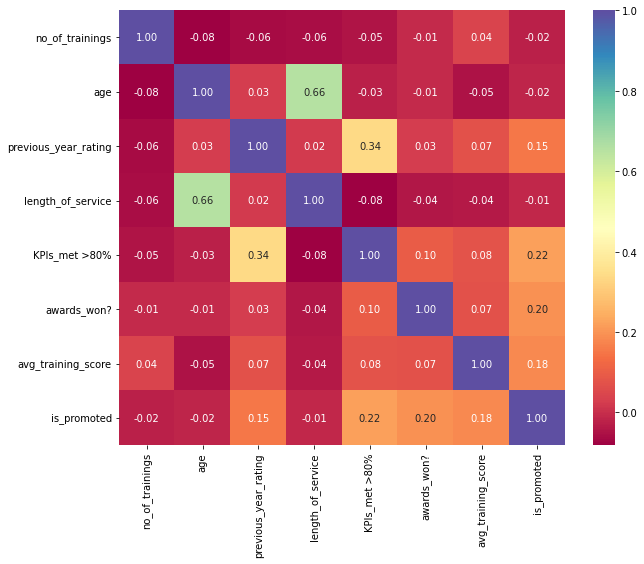

In [ ]:
# Checking the correlation of features and target and importing additional necesary libraries

import matplotlib.pyplot as plt
import seaborn as sns

features = ['no_of_trainings','age','previous_year_rating','length_of_service','KPIs_met >80%','awards_won?','avg_training_score','is_promoted']
corr_= promotions_df[features].corr()
plt.figure(figsize=(10,8))
sns.heatmap(corr_, annot=True, fmt = ".2f", cmap = "Spectral");

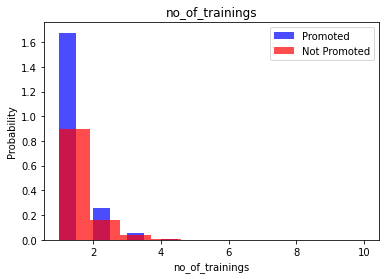

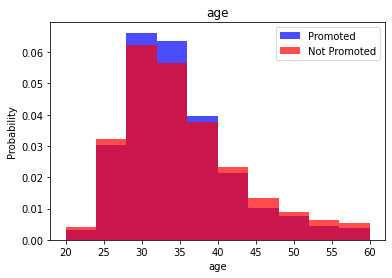

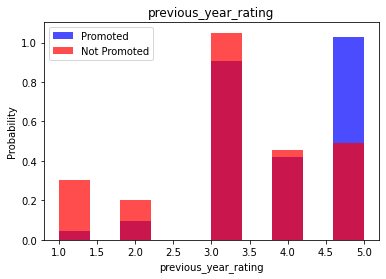

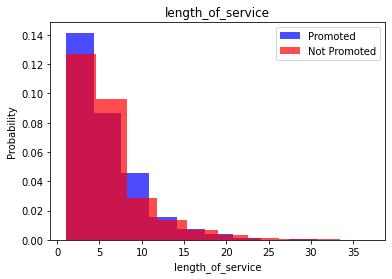

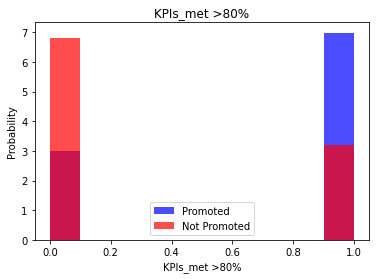

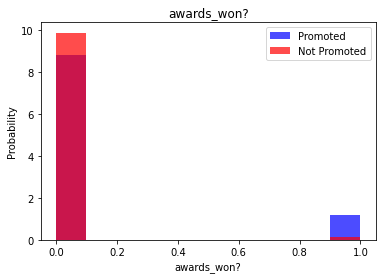

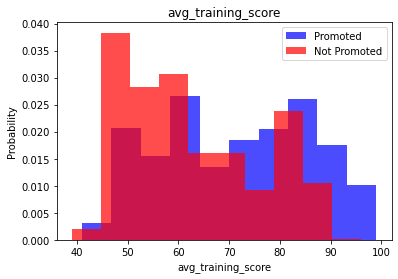

In [ ]:
# Plotting an Histogram for features to show the relationship between features and the targets 
for feature in features[:-1]:
  plt.hist(promotions_df[promotions_df['is_promoted']==1][feature], color= 'blue', alpha = 0.7, label = 'Promoted', density=True)
  plt.hist(promotions_df[promotions_df['is_promoted']==0][feature], color= 'red', alpha = 0.7, label = 'Not Promoted', density=True)
  plt.title(feature)
  plt.ylabel('Probability')
  plt.xlabel(feature)
  plt.legend()
  plt.show()


**Observation**

Some features i.e previous year rating, KPIs_met >80%, and awards won on the dataset show that you are most likely to be promoted according to the relationships seen between features and targets

##Data Modeling


In [ ]:
#Defining features and targets

#ImportING the necessary functions from sklearn
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split


features = promotions_df.drop(['education', 'recruitment_channel', 'is_promoted', 'department','region','gender'], axis=1)
target = promotions_df['is_promoted']

x_train, x_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

model = DecisionTreeClassifier()
model.fit(x_train, y_train)

test_predictions = model.predict(x_test)

print('Predictions:', test_predictions)
print('Correct answers:', y_test.values)



Predictions: [0 0 0 ... 0 0 0]
Correct answers: [0 0 0 ... 0 0 0]


In [ ]:
# Checking the accuracy of the models built
from sklearn.metrics import accuracy_score 
score = accuracy_score(y_test, test_predictions)  
score

0.8700966976829045

##Summary of Findings and Recommendations

The data in the dataset was first cleaned, then analysed before developing the said model. All numerical data was used as the features to determine the target. Using heatmaps and histograms populated, we were able to see the relationships between the features and our target. 

We trained a model using DecisionTreeClassifier() with an accuracy of 87% which is acceptable

This model will therefore allow the HR department to predict candidates eligible for promotion with a reasonable accuracy 